In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import io
from google.colab import files
uploaded = files.upload()
df=pd.read_excel(io.BytesIO(uploaded['CastAway Cruiselines Data-1.xlsx']))
df.head()

Saving CastAway Cruiselines Data-1.xlsx to CastAway Cruiselines Data-1.xlsx


,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Room Type,Customer Satisfaction Average of All Questions,Overall 1-5 Satisfaction
0,1936.37,1344.35,323.73,82.17,268.29,S,5.0,5
1,1749.14,1239.14,415.80,-172.26,164.34,S,3.6,4
2,1698.65,1157.31,283.14,-78.21,246.51,S,4.8,5
3,1509.56,1309.28,11.88,-99.99,328.68,S,4.4,4
4,2024.36,1040.41,671.22,-286.11,184.14,S,5.0,5


The correlation between 'Total Cost' and 'Overall 1-5 Satisfaction' is: 0.4683554989287353


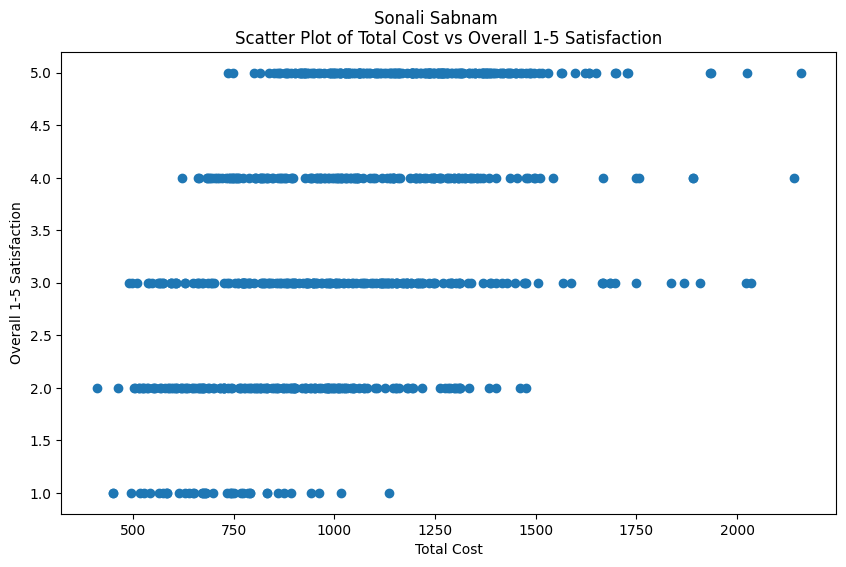

Sonali Sabnam: Output for Question 2
Optimization terminated successfully.
         Current function value: 0.693102
         Iterations 3
                              Logit Regression Results                              
Dep. Variable:     Overall 1-5 Satisfaction   No. Observations:                  525
Model:                                Logit   Df Residuals:                      524
Method:                                 MLE   Df Model:                            0
Date:                      Mon, 01 Jul 2024   Pseudo R-squ.:               3.690e-11
Time:                              23:10:04   Log-Likelihood:                -363.88
converged:                             True   LL-Null:                       -363.88
Covariance Type:                  nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0190  

In [ ]:
import matplotlib.pyplot as plt
# 1. Calculate the correlation between the variables "Total Cost" and "Overall 1-5 Satisfaction"

correlation = df['Total Cost'].corr(df['Overall 1-5 Satisfaction'])
print(f"The correlation between 'Total Cost' and 'Overall 1-5 Satisfaction' is: {correlation}")

#plot the two variables
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Cost'], df['Overall 1-5 Satisfaction'])
plt.title('Scatter Plot of Total Cost vs Overall 1-5 Satisfaction')
plt.xlabel('Total Cost')
plt.ylabel('Overall 1-5 Satisfaction')
plt.suptitle('Sonali Sabnam', fontsize='12', y=0.95)
plt.show()


# 2.	Build the best possible model you can, without any categorical variables, to predict customer satisfaction (Make sure the role of Customer Satisfaction is your dependent variable).
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

print("Sonali Sabnam: Output for Question 2")

# Assuming 'df' is your DataFrame and it has been loaded with the snapshot data
# 'X' are the independent variables and 'y' is the dependent variable (customer satisfaction)

X = df.drop(['Overall 1-5 Satisfaction','Room Type'], axis=1)
# y = df['Overall 1-5 Satisfaction']
y = (df['Overall 1-5 Satisfaction'] >= 4).astype(int)

X_intercept = pd.DataFrame({'Intercept': 1}, index=df.index)

X_train, X_test, y_train, y_test = train_test_split(X_intercept, y, test_size=0.3, random_state=42)

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()



print(result.summary())

y_pred_prob = result.predict(X_test)
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

misclassification_rate = (y_pred_binary != y_test).mean()
print("\nMisclassification Rate:", misclassification_rate)

# Extract parameter estimates and p-values
params = result.params
pvalues = result.pvalues

print("\nParameter Estimates:")
print(params)

print("\nP-values:")
print(pvalues)


# Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print("\nVariance Inflation Factors (VIF):")
print(vif)

# Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Initialize the model
# # model = LinearRegression()

# # # Fit the model
# # model.fit(X_train, y_train)

# # # Predict on the test set
# # y_pred = model.predict(X_test)

# # # Evaluate the model
# # mse = mean_squared_error(y_test, y_pred)
# # r2 = r2_score(y_test, y_pred)

# # print(f'Mean Squared Error: {mse}')
# # print(f'R-squared: {r2}')


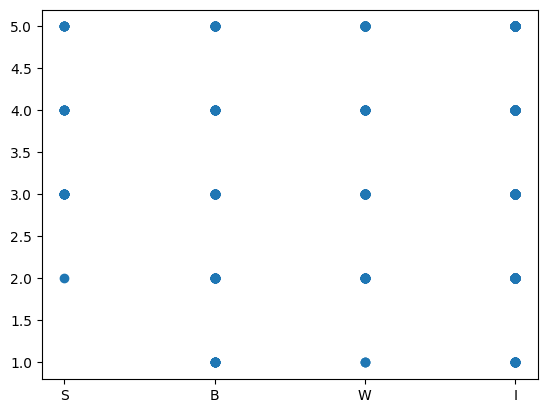

In [ ]:
# 3.	Does the choice of the type of room have significant impact on the customer satisfaction if it is the only predictor? If so which room type(s) is different from the reference type (cabins with a window)? How did you come to this conclusion using the software output?

#plot Room Type and Overall 1-5 Satisfaction
# plt.figure(figsize=(10, 6))
plt.scatter(df['Room Type'], df['Overall 1-5 Satisfaction'])
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and it has been loaded with the snapshot data

# Create dummy variables for "Room Type"
room_type_dummies = pd.get_dummies(df['Room Type'], prefix='RoomType', drop_first=True)

# Concatenate dummy variables with the original DataFrame
df_with_dummies = pd.concat([df, room_type_dummies], axis=1)

# Define your dependent and independent variables
X = df_with_dummies.filter(regex='^RoomType_')  # Select only the room type dummy variables
y = (df['Overall 1-5 Satisfaction'] >= 4).astype(int)  # Binary satisfaction

# Add intercept term
X_intercept = pd.DataFrame({'Intercept': 1}, index=df.index)
X = pd.concat([X_intercept, X], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

print(result.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and it has been loaded with the snapshot data

# Create dummy variables for "Room Type"
room_type_dummies = pd.get_dummies(df['Room Type'], prefix='RoomType', drop_first=True)

print("room_type_dummies", room_type_dummies)
# Concatenate dummy variables with the original DataFrame
df_with_dummies = pd.concat([df, room_type_dummies], axis=1)

# Define your dependent and independent variables
X = df_with_dummies.filter(regex='^RoomType_')  # Select only the room type dummy variables
y = (df['Overall 1-5 Satisfaction'] >= 4).astype(int)  # Binary satisfaction

# Add intercept term
X_intercept = pd.DataFrame({'Intercept': 1}, index=df.index)
X = pd.concat([X_intercept, X], axis=1)

# --- Handle potential non-numeric columns in X ---
# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns in X:", non_numeric_cols)

# If there are non-numeric columns, handle them appropriately:
if non_numeric_cols.size > 0:
    # Option 1: Drop non-numeric columns (if they are not relevant)
    X = X.drop(non_numeric_cols, axis=1)

    # Option 2: Convert non-numeric columns to numeric (if possible)
    # For example, if you have string categories, you can use LabelEncoder:
    # from sklearn.preprocessing import LabelEncoder
    # label_encoder = LabelEncoder()
    # for col in non_numeric_cols:
    #     X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

print(result.summary())

room_type_dummies      RoomType_I  RoomType_S  RoomType_W
0         False        True       False
1         False        True       False
2         False        True       False
3         False        True       False
4         False        True       False
..          ...         ...         ...
745        True       False       False
746        True       False       False
747        True       False       False
748        True       False       False
749        True       False       False

[750 rows x 3 columns]
Non-numeric columns in X: Index(['RoomType_I', 'RoomType_S', 'RoomType_W'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.693102
         Iterations 3
                              Logit Regression Results                              
Dep. Variable:     Overall 1-5 Satisfaction   No. Observations:                  525
Model:                                Logit   Df Residuals:                      524
Method:                      

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming `df` is your DataFrame and it contains 'Room Type' and 'Overall 1-5 Satisfaction'
# One-hot encode 'Room Type' with 'W' as the reference category
df_encoded = pd.get_dummies(df, columns=['Room Type'], drop_first=True)

# Ensure 'Overall 1-5 Satisfaction' is numeric, coercing errors to NaN
df_encoded['Overall 1-5 Satisfaction'] = pd.to_numeric(df_encoded['Overall 1-5 Satisfaction'], errors='coerce')

# Drop rows with missing values in 'Overall 1-5 Satisfaction'
df_encoded.dropna(subset=['Overall 1-5 Satisfaction'], inplace=True)

# The dependent variable (convert to integers after handling missing values)
y = df_encoded['Overall 1-5 Satisfaction'].astype(int)

# The independent variables (all room type columns except the reference 'W')
X = df_encoded.filter(regex='Room Type_')

# Add an intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Display the summary of the model
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
# file_path = 'path_to_your_file/CastAway Cruiselines Data-1.xlsx'
# df = pd.read_excel(file_path, sheet_name='Data')

import io
from google.colab import files
uploaded = files.upload()
df=pd.read_excel(io.BytesIO(uploaded['CastAway Cruiselines Data-1.xlsx']))
df.head()

# Check the unique room types
unique_room_types = df['Room Type'].unique()
print("Unique Room Types:", unique_room_types)

# Replace 'Cabins with a window' with 'Cabins_Window' for simplicity, if it's in your dataset
df['Room Type'] = df['Room Type'].replace('Cabins with a window', 'Cabins_Window')

# Create dummy variables for room type, with 'Cabins_Window' as the reference
room_type_dummies = pd.get_dummies(df['Room Type'], drop_first=True)

# Add dummy variables to the dataset
df = pd.concat([df, room_type_dummies], axis=1)

# Define the dependent variable
y = df['Overall 1-5 Satisfaction']

# Define the independent variables: including only dummy variables for room types
X = df[room_type_dummies.columns]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Check for any remaining non-numeric values and NaNs
print("Independent variables data types:\n", X.dtypes)
print("Dependent variable data type:\n", y.dtypes)
print("Sonali Sabnam: Question 3 Model Summary")

# Drop rows with NaN values that might have resulted from conversion
X = X.dropna()
y = y.dropna()

# Align the indices of X and y
X, y = X.align(y, join='inner', axis=0)
X = X.astype(float)
y = y.astype(float)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


Saving CastAway Cruiselines Data-1.xlsx to CastAway Cruiselines Data-1.xlsx
Unique Room Types: ['S' 'B' 'W' 'I']
Independent variables data types:
 const    float64
I           bool
S           bool
W           bool
dtype: object
Dependent variable data type:
 int64
Sonali Sabnam: Question 3 Model Summary
                               OLS Regression Results                               
Dep. Variable:     Overall 1-5 Satisfaction   R-squared:                       0.012
Model:                                  OLS   Adj. R-squared:                  0.008
Method:                       Least Squares   F-statistic:                     2.936
Date:                      Tue, 02 Jul 2024   Prob (F-statistic):             0.0326
Time:                              23:13:32   Log-Likelihood:                -1230.3
No. Observations:                       750   AIC:                             2469.
Df Residuals:                           746   BIC:                             2487.
Df Model:    

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
# file_path = '/mnt/data/CastAway Cruiselines Data-1.xlsx'  # Update path as needed
# df = pd.read_excel(file_path, sheet_name='Data')
#set df to null

df = None
df=pd.read_excel(io.BytesIO(uploaded['CastAway Cruiselines Data-1.xlsx']))
df.head()

# Load the dataset
# file_path = '/mnt/data/CastAway Cruiselines Data-1.xlsx'  # Update path as needed
# df = pd.read_excel(file_path, sheet_name='Data')

# Inspect column names
print("Column names in the DataFrame:", df.columns)

# Display the first few rows to understand the data
print(df.head())

# Define potential predictors (adjust column names based on inspection)
# Correct any discrepancies in the column names here
predictors = ['Room Type', 'Total Cost', 'Room Costs', 'Ship Board Expenses', 'Casino Expenses', 'Excursion Expenses']
dependent_variable = 'Overall 1-5 Satisfaction'

# Create dummy variables for 'Room Type', using the reference category
df['Room Type'] = df['Room Type'].replace('Cabins with a window', 'Cabins_Window')
df = pd.get_dummies(df, columns=['Room Type'], drop_first=True)

# Check for dummy variable names created
print("Column names after creating dummy variables:", df.columns)

# Create the feature set including the dummy variables
# Ensure all columns exist by inspecting the print output
dummy_columns = [col for col in df.columns if col.startswith('Room Type_')]
print("Dummy variable columns:", dummy_columns)
print("Sonali Sabnam: Question 4 Model Output")
# X = df[predictors + dummy_columns]

X = df.drop(['Overall 1-5 Satisfaction','Customer Satisfaction Average of All Questions'], axis=1)

# Include a constant term
X = sm.add_constant(X)

# Ensure all predictors are numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(df[dependent_variable], errors='coerce')

# Drop any rows with NaN values
X = X.dropna()
y = y.dropna()

# Align X and y to ensure they match
X, y = X.align(y, join='inner', axis=0)
X = X.astype(float)
y = y.astype(float)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()


# Print the summary of the regression
print(model.summary())


Column names in the DataFrame: Index(['Total Cost', 'Room Costs', 'Ship BoardExpenses ', 'Casino Expenses',
       'Excursion Expenses', 'Room Type',
       'Customer Satisfaction Average of All Questions',
       'Overall 1-5 Satisfaction'],
      dtype='object')
   Total Cost  Room Costs  Ship BoardExpenses   Casino Expenses  \
0     1936.37     1344.35               323.73            82.17   
1     1749.14     1239.14               415.80          -172.26   
2     1698.65     1157.31               283.14           -78.21   
3     1509.56     1309.28                11.88           -99.99   
4     2024.36     1040.41               671.22          -286.11   

   Excursion Expenses Room Type  \
0              268.29         S   
1              164.34         S   
2              246.51         S   
3              328.68         S   
4              184.14         S   

   Customer Satisfaction Average of All Questions  Overall 1-5 Satisfaction  
0                                          

In [ ]:
import io
from google.colab import files
# uploaded = files.upload()
data=pd.read_excel(io.BytesIO(uploaded['CastAway Cruiselines Data-1_Updated.xlsx']))
data.head()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the Excel file
# file_path = '/mnt/data/CastAway Cruiselines Data-1_Updated.xlsx'
# data = pd.read_excel(file_path)

# Create a binary target variable where 1 indicates a suite and 0 indicates other room types
data['Is_Suite'] = (data['Room Type'] == 'S').astype(int)

# Select the independent variables
X = data[['Room Costs', 'Overall 1-5 Satisfaction']]
y = data['Is_Suite']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

print("Misclassification Rate:", misclassification_rate)

# For completeness, printing the classification report as well
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:")
print(report)




Misclassification Rate: 0.0
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 146}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 150}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 150}}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# # Load the Excel file
# file_path = '/mnt/data/CastAway Cruiselines Data-1_Updated.xlsx'
# data = pd.read_excel(file_path)

# Create a binary target variable where 1 indicates a suite and 0 indicates other room types
data['Is_Suite'] = (data['Room Type'] == 'S').astype(int)

# Select the independent variables (initial model)
X_initial = data[['Room Costs', 'Overall 1-5 Satisfaction']]
y = data['Is_Suite']

# Split the data into training and testing sets (initial model)
X_train_initial, X_test_initial, y_train_initial, y_test_initial = train_test_split(X_initial, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model (initial model)
model_initial = LogisticRegression()
model_initial.fit(X_train_initial, y_train_initial)

# Predict on the test set (initial model)
y_pred_initial = model_initial.predict(X_test_initial)

# Evaluate the initial model
accuracy_initial = accuracy_score(y_test_initial, y_pred_initial)
misclassification_rate_initial = 1 - accuracy_initial

print("Initial Model Misclassification Rate:", misclassification_rate_initial)

# Select the independent variables (updated model)
X_updated = data[['Room Costs', 'Overall 1-5 Satisfaction', 'Casino Expenses', 'Excursion Expenses']]

# Split the data into training and testing sets (updated model)
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(X_updated, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model (updated model)
model_updated = LogisticRegression()
model_updated.fit(X_train_updated, y_train_updated)

# Predict on the test set (updated model)
y_pred_updated = model_updated.predict(X_test_updated)

# Evaluate the updated model
accuracy_updated = accuracy_score(y_test_updated, y_pred_updated)
misclassification_rate_updated = 1 - accuracy_updated

print("Updated Model Misclassification Rate:", misclassification_rate_updated)

# For completeness, printing the classification report as well for both models
print("\nInitial Model Classification Report:")
print(classification_report(y_test_initial, y_pred_initial))

print("\nUpdated Model Classification Report:")
print(classification_report(y_test_updated, y_pred_updated))


Initial Model Misclassification Rate: 0.0
Updated Model Misclassification Rate: 0.0

Initial Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00         4

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


Updated Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00         4

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
# file_path = '/mnt/data/CastAway Cruiselines Data-1.xlsx'  # Update path as needed
# df = pd.read_excel(file_path, sheet_name='Data')
#set df to null

df = None
df=pd.read_excel(io.BytesIO(uploaded['CastAway Cruiselines Data-1.xlsx']))
df.head()

# Load the dataset
# file_path = '/mnt/data/CastAway Cruiselines Data-1.xlsx'  # Update path as needed
# df = pd.read_excel(file_path, sheet_name='Data')

# Inspect column names
print("Column names in the DataFrame:", df.columns)

# Display the first few rows to understand the data
print(df.head())

# Define potential predictors (adjust column names based on inspection)
# Correct any discrepancies in the column names here
predictors = ['Room Type', 'Total Cost', 'Room Costs', 'Ship Board Expenses', 'Casino Expenses', 'Excursion Expenses']
dependent_variable = 'Overall 1-5 Satisfaction'

# Create dummy variables for 'Room Type', using the reference category
df['Room Type'] = df['Room Type'].replace('Cabins with a window', 'Cabins_Window')
df = pd.get_dummies(df, columns=['Room Type'], drop_first=True)

# Check for dummy variable names created
print("Column names after creating dummy variables:", df.columns)

# Create the feature set including the dummy variables
# Ensure all columns exist by inspecting the print output
dummy_columns = [col for col in df.columns if col.startswith('Room Type_')]
print("Dummy variable columns:", dummy_columns)
print("Sonali Sabnam: Question 4 Model Output")
# X = df[predictors + dummy_columns]

X = df.drop(['Overall 1-5 Satisfaction','Customer Satisfaction Average of All Questions'], axis=1)

# Include a constant term
X = sm.add_constant(X)

# Ensure all predictors are numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(df[dependent_variable], errors='coerce')

# Drop any rows with NaN values
X = X.dropna()
y = y.dropna()

# Align X and y to ensure they match
X, y = X.align(y, join='inner', axis=0)
X = X.astype(float)
y = y.astype(float)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()


# Print the summary of the regression
print(model.summary())


Column names in the DataFrame: Index(['Total Cost', 'Room Costs', 'Ship BoardExpenses ', 'Casino Expenses',
       'Excursion Expenses', 'Room Type',
       'Customer Satisfaction Average of All Questions',
       'Overall 1-5 Satisfaction'],
      dtype='object')
   Total Cost  Room Costs  Ship BoardExpenses   Casino Expenses  \
0     1936.37     1344.35               323.73            82.17   
1     1749.14     1239.14               415.80          -172.26   
2     1698.65     1157.31               283.14           -78.21   
3     1509.56     1309.28                11.88           -99.99   
4     2024.36     1040.41               671.22          -286.11   

   Excursion Expenses Room Type  \
0              268.29         S   
1              164.34         S   
2              246.51         S   
3              328.68         S   
4              184.14         S   

   Customer Satisfaction Average of All Questions  Overall 1-5 Satisfaction  
0                                          

In [ ]:
import io
from google.colab import files
uploaded = files.upload()
data=pd.read_excel(io.BytesIO(uploaded['CastAway Cruiselines Data-1_Updated.xlsx']))
data.head()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the Excel file
# file_path = '/mnt/data/CastAway Cruiselines Data-1_Updated.xlsx'
# data = pd.read_excel(file_path)



# Create a binary target variable where 1 indicates a suite and 0 indicates other room types
data['Is_Suite'] = (data['Room Type'] == 'S').astype(int)

# Select the independent variables
X = data[['Room Costs', 'Overall 1-5 Satisfaction']]
y = data['Is_Suite']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

print("Misclassification Rate:", misclassification_rate)

# For completeness, printing the classification report as well
report = classification_report(y_test, y_pred, output_dict=True)
print("Sonali Sabnam: Logistic Regression Classification Report:")
print(report)




Saving CastAway Cruiselines Data-1_Updated.xlsx to CastAway Cruiselines Data-1_Updated.xlsx
Misclassification Rate: 0.0
Sonali Sabnam: Logistic Regression Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 146}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 150}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 150}}
